# Titanic dataset
## Introduction

Dataset yang digunakan merupakan data yang terkumpul dari penumpang kapal Titanic yang tenggelam pada tahun 1912 karena bertabrakan dengan gunung es. Ada beberapa variabel yang perlu dijelaskan dalam dataset tersebut:

##### Survived
Kondisi penumpang tersebut pasca-tabrakan (0=mati, 1=hidup)
##### Pclass
Kelas dari penumpang tersebut
##### SibSp
Jumlah saudara atau pasangan di kapal
##### Parch
Jumlah orang tua atau anak di kapal
##### Embarked
Pelabuhan penumpang tersebut naik (Cherbourg, Queenstown, Southampton)

* Name, Sex, Age, Ticket, dan Fare sudah intuitif

Tujuan dari model ini adalah menggunakan machine learning untuk mencari pola dari penumpang yang berhasil bertahan hidup setelah kapal karam dengan cara classification.

In [6]:
# imports
# essentials
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# models
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
# dataset split
from sklearn.model_selection import train_test_split

## Data cleaning and preprocessing

In [ ]:
# pengecekan data
data = pd.read_csv('titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# banyak data yang kosong di Age dan Cabin
# ada 2 penumpang tanpa pelabuhan yang tercatat
# sekitar 38.4% penumpang bertahan hidup
# umur penumpang berada diantara 0.4 dan 80
# Sex, Ticket, Cabin, dan Embarked sebaiknya diubah menjadi value numerik supaya dapat dipakai

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Age cleaning

In [ ]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

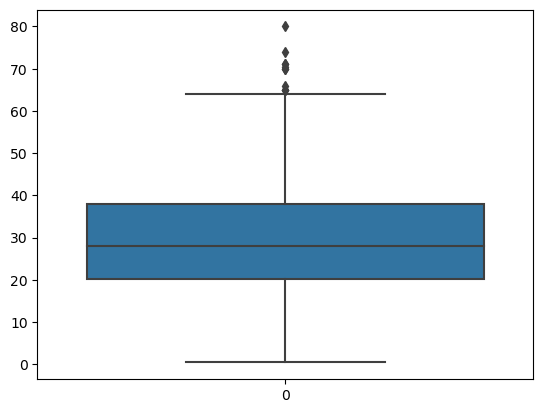

In [ ]:
# mencari outlier
sns.boxplot(data['Age'])

In [ ]:
data.loc[np.where(data['Age']>65)]['Age']

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

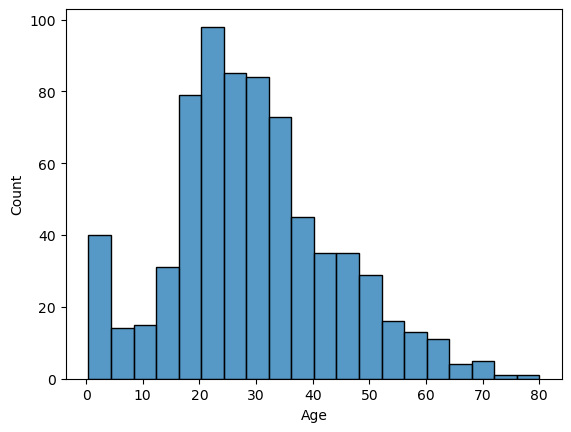

In [ ]:
# mencari distribusi
sns.histplot(data['Age'])

In [ ]:
# karena terdapat beberapa outlier dan data agak miring kita gunakan median untuk mengisi kekosongan
median = data['Age'].median()
data['Age'] = data['Age'].fillna(median).astype(int)
data['Age'].isna().sum()

0

### Embarked cleaning

In [ ]:
# Hanya ada 2 value yang hilang jadi bisa diisi dengan data yang paling banyak muncul
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
# paling banyak adalah S
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'].isna().sum()

0

### Cabin cleaning

In [ ]:
data['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
# 204 dari 891 ada isinya
# terlalu sedikit, lebih baik di drop saja
data = data.drop(columns=['Cabin'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


### Preprocessing lainnya
- Beberapa variabel seperti Sex dan Embarked sebaiknya diubah menjadi nilai numerik
- PassengerId, Name, dan Ticket tidak penting (setiap value unique sehingga tidak menentukan apapun) maka dapat didrop
- Fare dan Age dapat dikategorikan
- SibSp dan Parch dapat digabungkan menjadi Fam (jumlah anggota keluarga)

In [ ]:
# mengubah Sex
sex = {'male':0, 'female':1}
data['Sex'] = data['Sex'].map(sex)
data['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [ ]:
# mengubah Embarked
emb = {'S':0, 'C':1, 'Q':2}
data['Embarked'] = data['Embarked'].map(emb)
data['Embarked'].describe()

count    891.000000
mean       0.361392
std        0.635673
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [ ]:
data = data.drop(columns=['PassengerId','Name', 'Ticket'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 52.3 KB


In [ ]:
# pengategorian Age
data.loc[ data['Age']<=10, 'Age'] = 0
data.loc[(data['Age']>10) & (data['Age']<=18), 'Age'] = 1
data.loc[(data['Age']>18) & (data['Age']<=27), 'Age'] = 2
data.loc[(data['Age']>27) & (data['Age']<=35), 'Age'] = 3
data.loc[(data['Age']>35) & (data['Age']<=50), 'Age'] = 4
data.loc[ data['Age']>50, 'Age'] = 5
data['Age'].value_counts()

3    337
2    198
4    153
1     75
5     64
0     64
Name: Age, dtype: int64

In [ ]:
# pengategorian Fare
data.loc[ data['Fare']<=8, 'Fare'] = 0
data.loc[(data['Fare']>8) & (data['Fare']<=12), 'Fare'] = 1
data.loc[(data['Fare']>12) & (data['Fare']<=25), 'Fare'] = 2
data.loc[(data['Fare']>25) & (data['Fare']<=50), 'Fare'] = 3
data.loc[(data['Fare']>50) & (data['Fare']<=100), 'Fare'] = 4
data.loc[ data['Fare']>100, 'Fare'] = 5
data['Fare'] = data['Fare'].astype(int)
data['Fare'].value_counts()

0    241
2    183
3    174
1    133
4    107
5     53
Name: Fare, dtype: int64

In [ ]:
# Penggabungan SibSp dan Parch
data['Fam'] = data['SibSp']+data['Parch']
data = data.drop(columns=['SibSp','Parch'])
data['Fam'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Fam, dtype: float64

In [ ]:
# hasil setelah preprocessing
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam
0,0,3,0,2,0,0,1
1,1,1,1,4,4,1,1
2,1,3,1,2,0,0,0
3,1,1,1,3,4,0,1
4,0,3,0,3,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int32
 4   Fare      891 non-null    int32
 5   Embarked  891 non-null    int64
 6   Fam       891 non-null    int64
dtypes: int32(2), int64(5)
memory usage: 41.9 KB


## Algoritma Machine Learning

In [ ]:
# split dataset untuk testing dan training
X = data.loc[:, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Fam']]
y = data.loc[:, ['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle=True)

### Statsmodels Logistic Regression

In [ ]:
logreg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.429812
         Iterations 6


In [ ]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.3510
Time:                        23:46:56   Log-Likelihood:                -306.03
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 2.120e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.4822      0.083     -5.797      0.000      -0.645      -0.319
Sex            2.7964      0.224     12.461      0.000       2.357       3.236
Age           -0.4096      0.081     -5.080      0.000      -0.568      -0.252
Fare           0.4117      0.080      5.136      0.000       0.255       0.569
Embarked       0.3044      0.159      1.914      0.056      -0.007       0.616
Fam           -0.3665      0.089     -4.137      0.000      -0.540      -0.193
==============================================================================
"""

Menurut p-value (`P>|z|`), semua predictor yang ada kecuali pelabuhan keberangkatan berhubungan dengan kemungkinan hidup penumpang. Hal ini bisa jadi karena variabel yang kurang penting (PassengerId, Name, Ticket) sudah dibuang pada saat preprocessing data.
<br>
Analisa data dan penalaran:
- Semakin rendah kelas semakin mungkin hidup (penumpang kelas 1 memiliki akses ke fasilitas kapal terbaik)
- Perempuan lebih mungkin hidup daripada laki-laki (saat evakuasi perempuan diutamakan)
- Orang muda lebih banyak yang hidup (anak-anak diutamakan untuk evakuasi, orang tua lebih sulit untuk bergerak sehingga tertinggal di kapal)
- Semakin tinggi harga tiket, semakin besar kemungkinan hidup (harga tiket yang tinggi menunjukkan fasilitas yang lebih memadai, mirip Pclass)
- Embarked kurang akurat sebagai prediktor (pelabuhan yang dijadikan variabel bukanlah sesuatu yang linear, namun merupakan suatu kategori yang dijadikan linear untuk diproses program)
- Semakin sedikit keluarga semakin besar kemungkinan hidup (Tidak perlu mencari/menolong satu sama lain?)

### SciKit Models
Keakuratan hasil prediksi model direpresentasikan dalam persentase, acc_sco untuk keakuratan dengan dataset test, dan acc_log untuk keakuratan dengan dataset train.
(acc_sco dan acc_log menggunakan perbandingan true positive)

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train.values.ravel())
y_pred = logReg.predict(X_test)
acc_sco = round(accuracy_score(y_test, y_pred)*100, 2)
acc_log = round(logReg.score(X_train, y_train)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

76.54 %
81.74 %


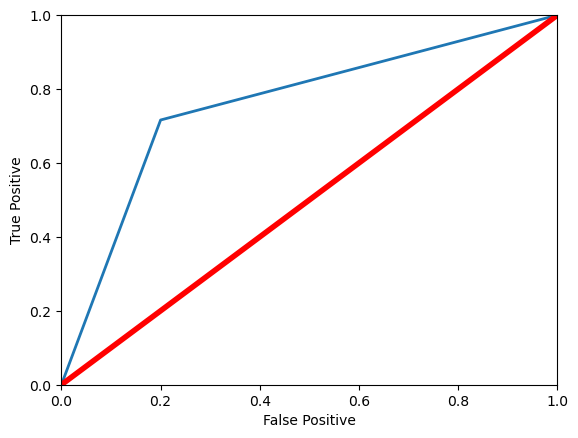

In [ ]:
# roc curve
fp, tp, thresholds = roc_curve(y_test, y_pred)

plt.plot(fp, tp, linewidth=2)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.show()

In [ ]:
lda = LDA()
lda.fit(X_train, y_train.values.ravel())
y_pred = lda.predict(X_test)
acc_sco = round(accuracy_score(y_test, y_pred)*100, 2)
acc_log = round(lda.score(X_train, y_train)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

74.86 %
80.34 %


In [ ]:
qda = QDA()
qda.fit(X_train, y_train.values.ravel())
y_pred = qda.predict(X_test)
acc_sco = round(accuracy_score(y_test, y_pred)*100, 2)
acc_log = round(qda.score(X_train, y_train)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

78.21 %
82.02 %


In [ ]:
naBa = GaussianNB()
naBa.fit(X_train, y_train.values.ravel())
y_pred = naBa.predict(X_test)
acc_sco = round(accuracy_score(y_test, y_pred)*100, 2)
acc_log = round(naBa.score(X_train, y_train)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

76.54 %
77.95 %


## Resampling methods
Jd, Resampling Methods yang akan digunakan adalah:

1.   *Validation Set*
2.   *K-fold cross validation*

Kita juga akan membahas 1 per 1 mengenai *Mean Squared Error* (MSE) dan *Bias-Variance Trade-Off* nya


In [13]:
# pengecekan data
url = 'https://raw.githubusercontent.com/Nyanderfull/ML_Titinik/main/titanic.csv?token=GHSAT0AAAAAACIXZ3SRGCGLJ737FAJ2IAFAZJVHZWA'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
